In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [3]:
cwd = os.getcwd()
print(cwd)


/Volumes/Work/Projects/cpiprediction/notebooks


In [6]:
overall_raw = pd.read_excel("../data/raw/CPIOverall.xlsx")
housing_raw = pd.read_excel("../data/raw/Housing.xlsx")
apparel_raw = pd.read_excel("../data/raw/Apparel.xlsx")
transportation_raw = pd.read_excel("../data/raw/Transportation.xlsx")
education_raw = pd.read_excel("../data/raw/Education.xlsx")
medical_raw = pd.read_excel("../data/raw/MedicalCare.xlsx")
food_raw = pd.read_excel("../data/raw/Food.xlsx")
recreation_raw = pd.read_excel("../data/raw/Recreation.xlsx")
other_goods_raw = pd.read_excel("../data/raw/OtherGoods.xlsx")


In [79]:
# data transformation into time series data
def transform_data(df):
    transformed_data = []
    months = df.loc[:, df.columns.drop("Year")].columns
    for data_tuple in df.itertuples():
        year = getattr(data_tuple, 'Year')
        for month in months:
            value = getattr(data_tuple, month)
            transformed_data.append(
                ['01' + ' ' + str(month) + ' ' + str(year), value])
    transformed_df = pd.DataFrame(transformed_data, columns=['time', 'value'])
    transformed_df['time'] = pd.to_datetime(transformed_df['time'])
    return transformed_df


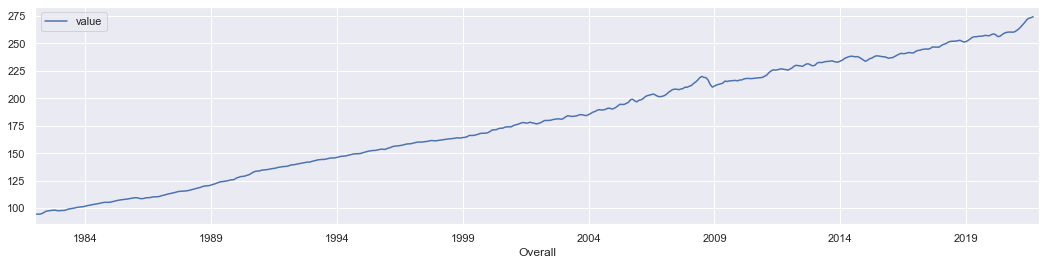

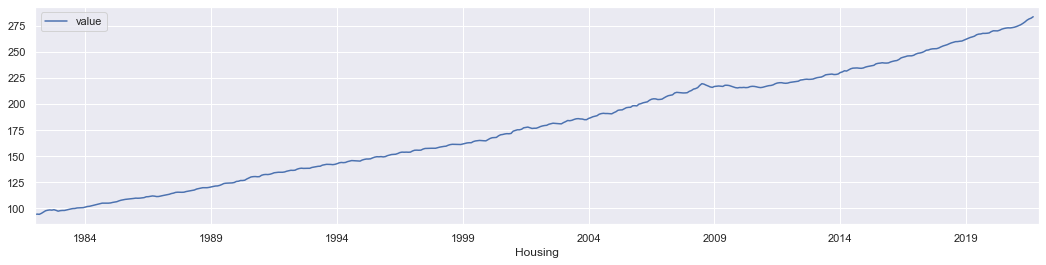

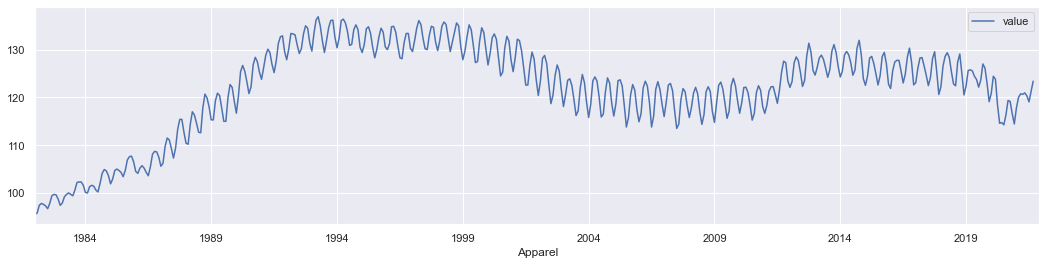

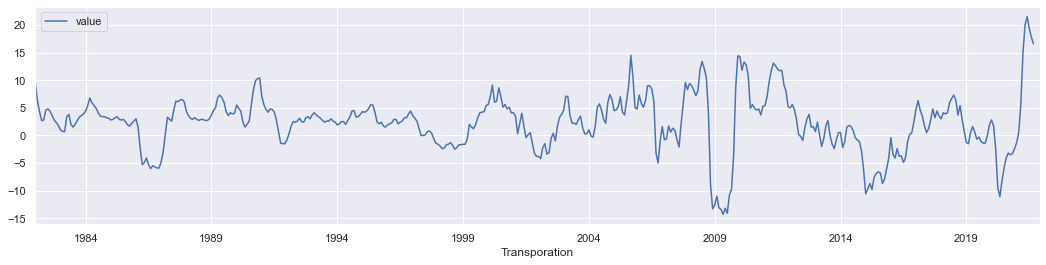

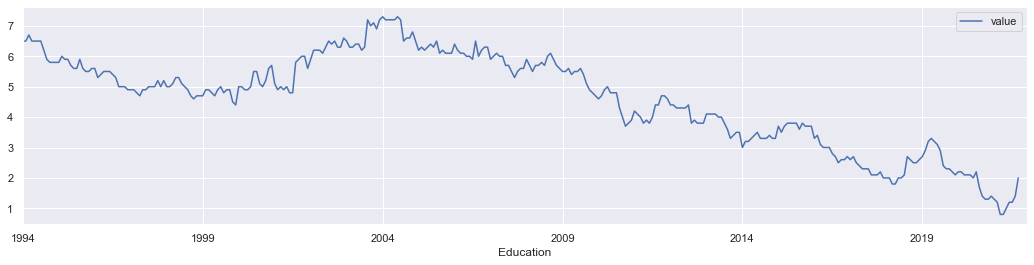

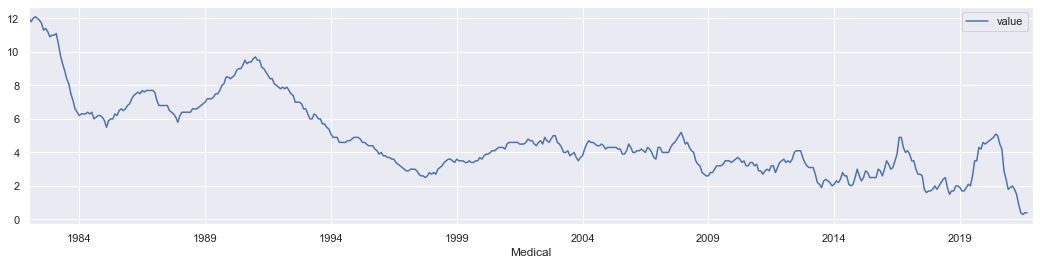

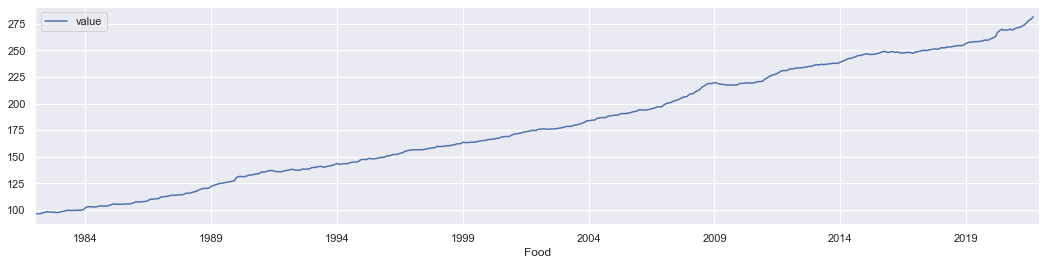

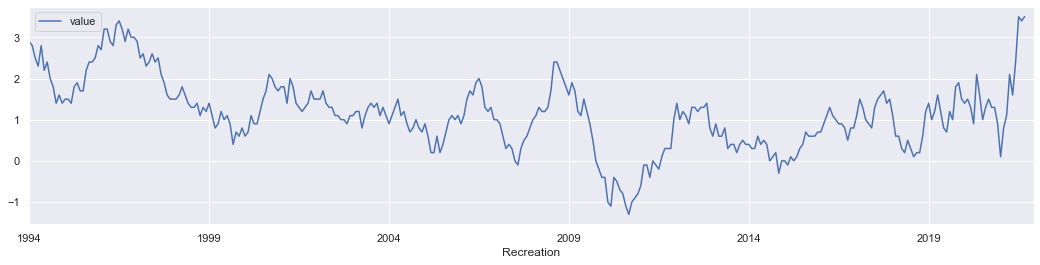

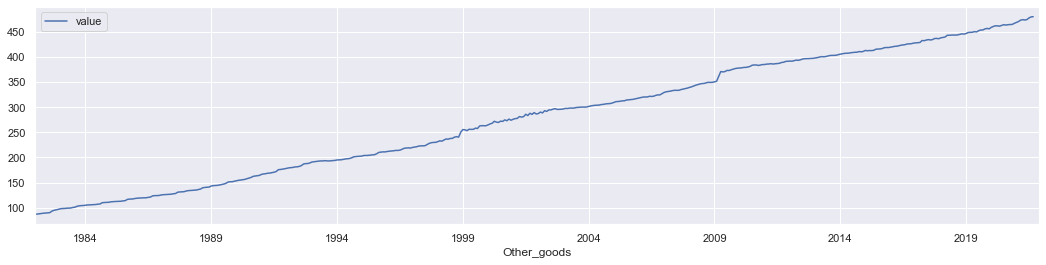

In [114]:
cpi_factors = [
    {'overall': overall_raw},
    {'housing': housing_raw},
    {'apparel': apparel_raw},
    {'transporation': transportation_raw},
    {'education': education_raw},
    {'medical': medical_raw},
    {'food': food_raw},
    {'recreation': recreation_raw},
    {'other_goods': other_goods_raw}
]
sns.set(rc={'figure.figsize': (18, 4)})

for cpi_factor in cpi_factors:
    name = cpi_factor.keys()
    name = list(name)[0]
    cpi_factor = transform_data(cpi_factor[name])
    cpi_factor.plot(x='time',y='value')
    plt.xlabel(name.capitalize())